**Exploratory Data Analysis on the Titanic Dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("train.csv")

In [3]:
# View the first 5 rows of the dataset
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Categorizing columns: Numerical, Categorical, and Mixed

Column Types
--1)Numerical - Age,Fare,PassengerId
--2)Categorical - Survived, Pclass, Sex, SibSp, Parch,Embarked
--3)Mixed - Name, Ticket, Cabin

In [4]:
# Check the dataset's size (rows, columns)

df.shape

(891, 12)

Univariate Analysis

In [5]:
# Age
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [6]:
df['Age'].isnull().sum()/len(df['Age'])*100

np.float64(19.865319865319865)

<Axes: xlabel='Age', ylabel='Count'>

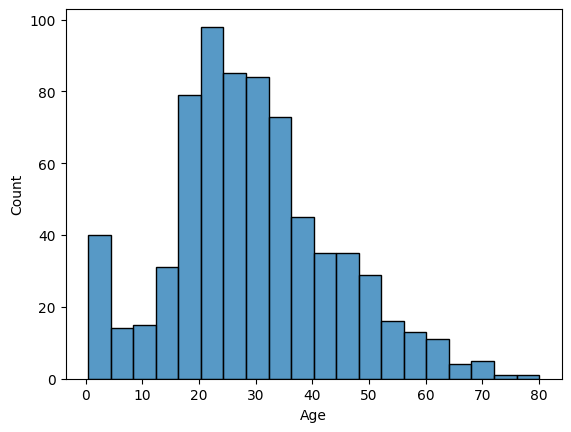

In [7]:
sns.histplot(df['Age'])

<Axes: xlabel='Age', ylabel='Density'>

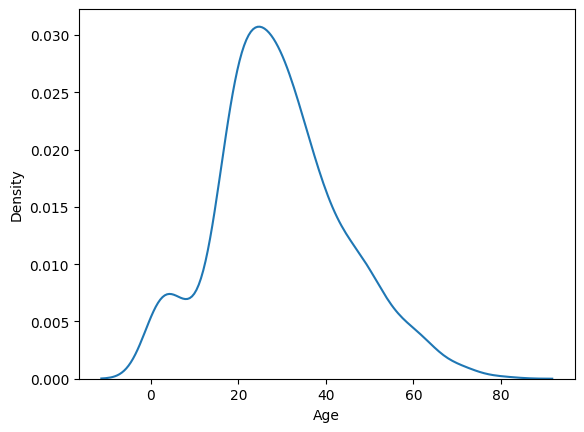

In [8]:
# Showing the distribution of 'Age' with a KDE plot

sns.kdeplot(df['Age'])

<Axes: ylabel='Age'>

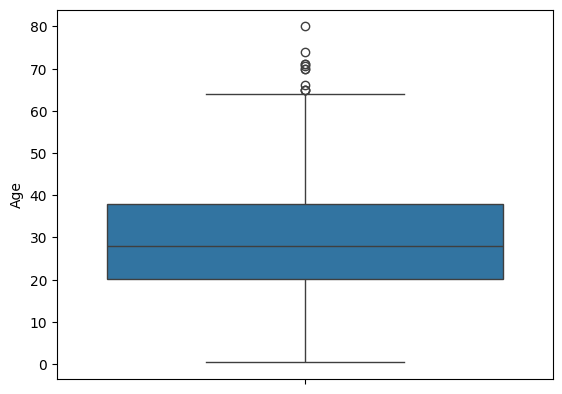

In [9]:
# Identifying outliers in 'Age' using a boxplot

sns.boxplot(df['Age'])

In [10]:
# Checking the skewness of the 'Age' column

df['Age'].skew()

np.float64(0.38910778230082704)

In [11]:
# Checking for rows with potential outliers in 'Age'

df[df['Age']>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


Conclusions on Age column
1) Age is almost normally distributed
2) 19.86% of the values are missing
3) There are some outliers

In [12]:
# Fare

df['Fare'].isnull().sum()

np.int64(0)

In [13]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

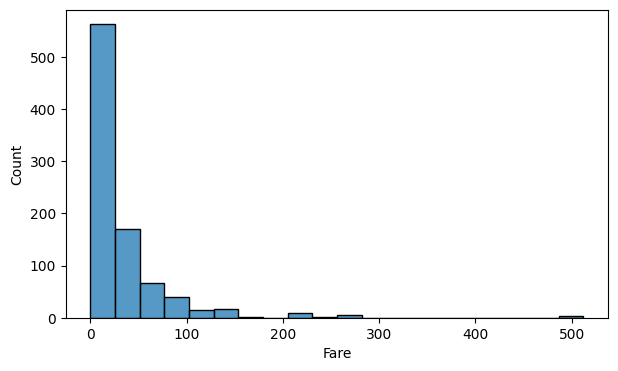

In [14]:
plt.figure(figsize=(7,4))
sns.histplot(df['Fare'],bins=20)

<Axes: xlabel='Fare', ylabel='Density'>

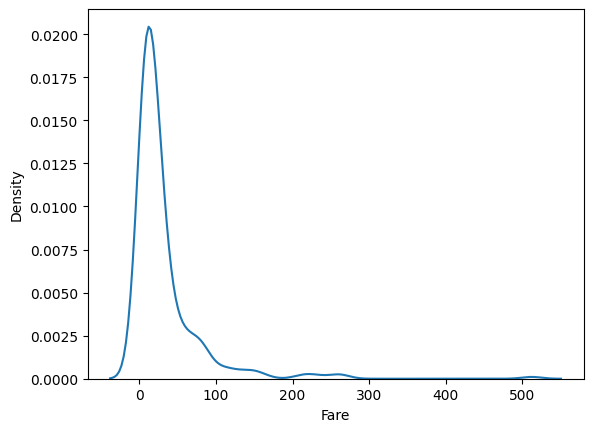

In [15]:
# Plotting the distribution of 'Fare'

sns.kdeplot(df['Fare'])

<Axes: ylabel='Fare'>

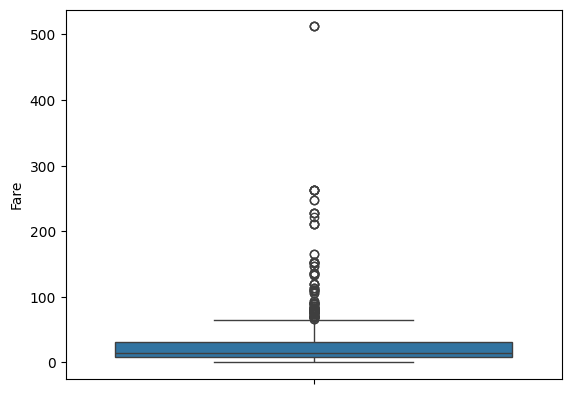

In [16]:
# Identifying outliers in 'Fare' using a boxplot

sns.boxplot(df['Fare'])

In [17]:
# Checking for rows with potential outliers in 'Fare'

df[df['Fare'] > 250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [18]:
# Checking the skewness of the 'Fare' column

df['Fare'].skew()

np.float64(4.787316519674893)

## Conclusions

1) The data is highly(positively) skewed
2) Fare column actually contains the group fare and not the individual fare(This migth be and issue)
3) We need to create a new col called individual fare

In [19]:
# Survived

df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [20]:
df['Survived'].isnull().sum()

np.int64(0)

<Axes: ylabel='count'>

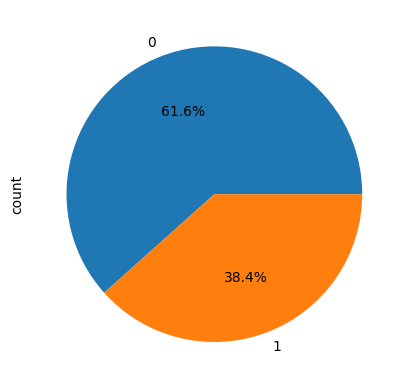

In [21]:
# Plotting the pie chart for 'Survived' value distribution

df['Survived'].value_counts().plot(kind='pie',autopct='%0.1f%%')

**Pclass**

In [22]:
# Checking the count of each 'Pclass' category

df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [23]:
df['Pclass'].isnull().sum()

np.int64(0)

<Axes: ylabel='count'>

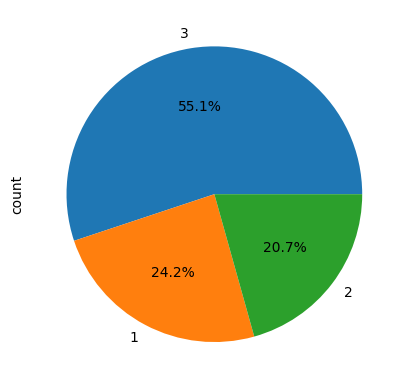

In [24]:
# Plotting the pie chart for 'Pclass' category distribution

df['Pclass'].value_counts().plot(kind='pie',autopct='%0.1f%%')

**Sex**


In [25]:
df['Sex'].isnull().sum()

np.int64(0)

In [26]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: ylabel='count'>

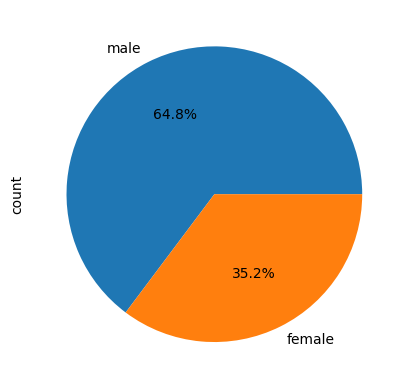

In [27]:
# Visualizing the gender distribution with a pie chart

df['Sex'].value_counts().plot(kind='pie',autopct='%0.1f%%')

C:\Users\harsh\AppData\Local\Temp\ipykernel_16960\2100912442.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=survival_rate,x='Sex',y='Survived',palette='coolwarm')


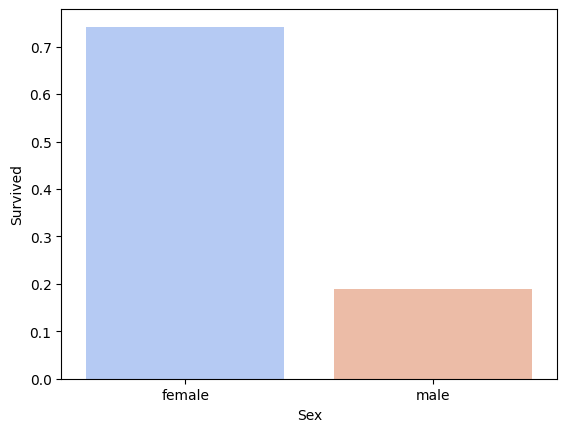

In [28]:
# Comparing survival rates between males and females

survival_rate = df.groupby('Sex')['Survived'].mean().reset_index()
sns.barplot(data=survival_rate,x='Sex',y='Survived',palette='coolwarm')
plt.show()

**SibSp**

In [29]:
df['SibSp'].isnull().sum()

np.int64(0)

In [30]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [31]:
(df['SibSp']==0).sum()/len(df['SibSp'])*100

np.float64(68.23793490460157)

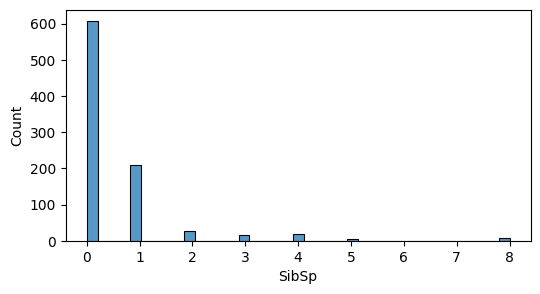

In [32]:
# Visualizing the distribution of 'SibSp'

plt.figure(figsize=(6,3))
sns.histplot(df['SibSp'])
plt.show()

**Parch**

In [33]:
df['Parch'].isnull().sum()

np.int64(0)

In [34]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch', ylabel='Count'>

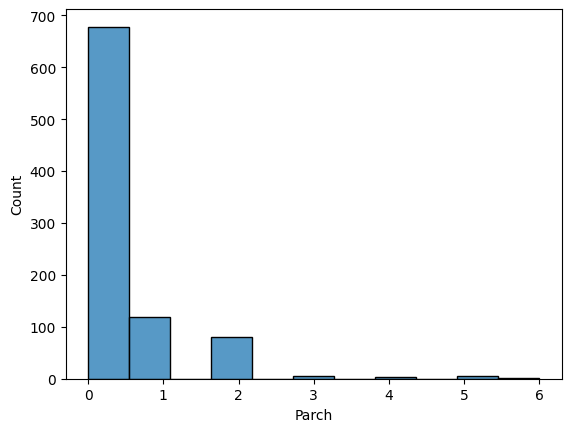

In [35]:
# Plotting the distribution of 'Parch' (parents/children count on board)

sns.histplot(df['Parch'])

**Embarked**

In [36]:
df['Embarked'].isnull().sum()

np.int64(2)

In [37]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: ylabel='count'>

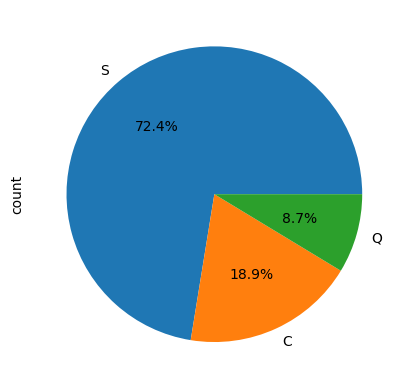

In [38]:
# Plotting the pie chart for 'Embarked' category distribution

df['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')

# Conclusion of Univariate Analysis

- **Missing Values**: 19.86% of the values in the dataset are missing.
- **Outliers in Age**: The age column contains outliers, which might affect the analysis and should be dealt with appropriately.

- **Fare Column**: The fare column appears to represent group fares rather than individual fares. This could introduce bias, and a new column representing individual fares needs to be created.

- **Survival Rate**: More than 60% of the passengers did not survive, highlighting the severity of the disaster.

- **Gender and Survival**: Females had a significantly higher survival rate compared to males, suggesting that gender played a key role in survival outcomes.

- **Family Size**: Around 68% of passengers were traveling without any siblings or spouses, which could be important when considering social dynamics during the disaster.

- **Family Size and Alone Status**: The 'Parch' and 'SibSp' columns can be merged to create a new 'family_size' column, which could be insightful in understanding the relationship between family size and survival. Additionally, a new 'is_alone' column can be created to identify passengers traveling alone.



**Other Bivariate Analysis**

In [39]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Analyzing the survival rate across different 'Pclass' categories

pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

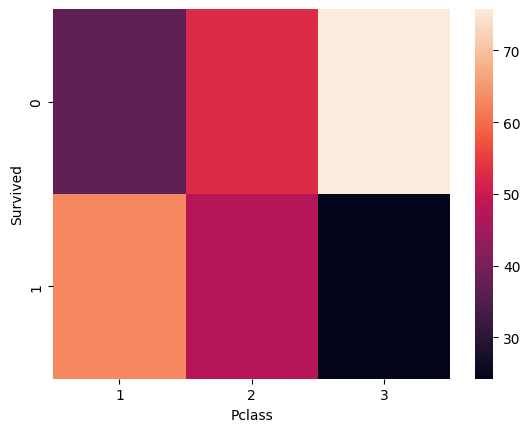

In [41]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100)

Analyzing relationships between various variables using cross-tabulation


In [42]:
pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


In [43]:
pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


In [44]:
pd.crosstab(df['Sex'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [45]:
pd.crosstab(df['Pclass'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


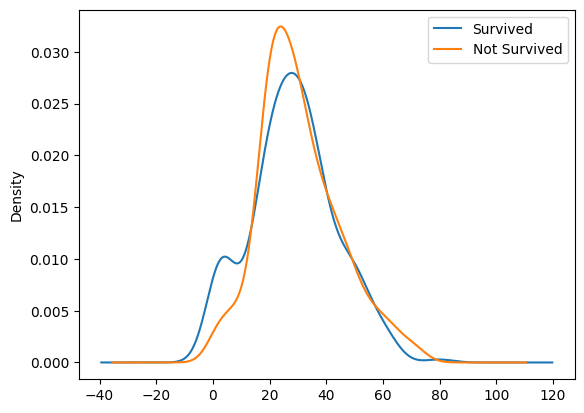

In [46]:
# survived and age
df[df['Survived']==1]['Age'].plot(kind='kde',label='Survived')
df[df['Survived']==0]['Age'].plot(kind='kde',label='Not Survived')
plt.legend()
plt.show()

In [47]:
# Feature Engineering on Fare column
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [48]:
df[df['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [49]:
df[df['Name'].str.contains('Sage')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


According to the data we have in the columns 'SibSp' and 'Parch', not all rows are present in this DataFrame. We need to import another dataset, which does not have the 'Survived' column, for machine learning.

In [50]:
df1 = pd.read_csv('test.csv')
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [51]:
df = pd.concat([df,df1])

In [52]:
df.reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [53]:
df[df['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


In [54]:
df[df['Ticket']=='CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


In [55]:
df['individual_fare'] = df['Fare']/(df['SibSp']+df['Parch']+1)

<Axes: >

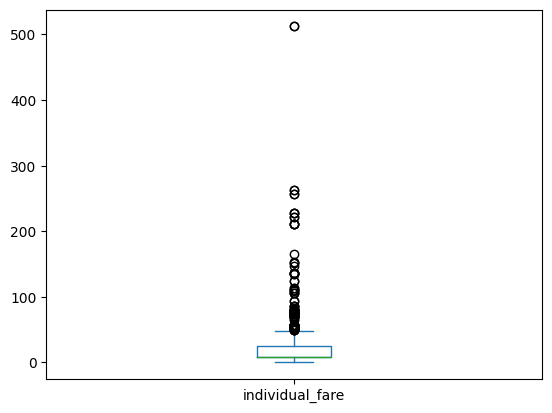

In [56]:
df['individual_fare'].plot(kind='box')

We still have an outlier, so let's check if anyone actually paid more than 500 for a ticket.

In [57]:
df[['Fare','individual_fare']].describe()

,Fare,individual_fare
count,1308.000000,1308.000000
mean,33.295479,20.518215
std,51.758668,35.774337
min,0.000000,0.000000
25%,7.895800,7.452767
50%,14.454200,8.512483
75%,31.275000,24.237500
max,512.329200,512.329200


Before feature engineering, the average fare was 33.30 with high variability due to outliers. After dividing fares among individuals, the average dropped to 20.52, reducing variability and making the data more suitable for analysis.

In [58]:
df['family_size'] = df['SibSp']+df['Parch']+1

In [59]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,1


Creating a new column called Family Type to change the data type to categorical.
family_type
-- 1 = alone
-- 2-4 = small
-- >5 = large

In [60]:
def family_size_category(x):
    if x==1:
        return 'alone'
    elif x>1 and x<5:
        return 'small'
    else:
        return 'large'
    
df['family_type'] = df['family_size'].apply(family_size_category)

In [61]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,alone
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,alone
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,alone


In [62]:
pd.crosstab(df['Survived'],df['family_type'],normalize='columns')*100

family_type,alone,large,small
Survived,,,
0.0,69.646182,83.870968,42.123288
1.0,30.353818,16.129032,57.876712


Conclusion
Passengers traveling alone or in large families had lower survival rates, with survival percentages of 30.35% and 16.13%, respectively. Small families had the highest survival rate at 57.88%, indicating they were more likely to survive.

Now, we will extract information from the Name column to analyze the relationship between survival and titles or surnames.

In [63]:
df['Name'].str.split(',').str.get(0)
df['surname'] = df['Name'].str.split(',').str.get(0)

In [64]:
df['title'] = df['Name'].str.split(",").str.get(1).str.strip().str.split(' ').str.get(0)

In [65]:
df['title'].value_counts()

title
Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Major.         2
Mlle.          2
Ms.            2
Mme.           1
Don.           1
Sir.           1
Lady.          1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: count, dtype: int64

In [66]:
df['title'] = df['title'].str.replace('Rev.','other')
df['title'] = df['title'].str.replace('Dr.','other')
df['title'] = df['title'].str.replace('Col.','other')
df['title'] = df['title'].str.replace('Major.','other')
df['title'] = df['title'].str.replace('Capt.','other')
df['title'] = df['title'].str.replace('the','other')
df['title'] = df['title'].str.replace('Jonkheer.','other')

In [67]:
new_title = df[df['title'].isin(['Mr.','Miss.','Mrs.','Master.','ootherr'])]

In [68]:
pd.crosstab(new_title['Survived'],new_title['title'],normalize='columns')*100

title,Master.,Miss.,Mr.,Mrs.,ootherr
Survived,,,,,
0.0,42.5,30.21978,84.332689,20.8,72.222222
1.0,57.5,69.78022,15.667311,79.2,27.777778


conclusion
Titles like Mrs., Miss., and Master. had higher survival rates (79.2%, 69.78%, and 57.5%, respectively). In contrast, Mr. and other titles had significantly lower survival rates at 15.67% and 27.78%.

In [69]:
df['Cabin'].isnull().sum()/len(df['Cabin'])*100
# around 77% of values are missing

np.float64(77.46371275783041)

In [70]:
# Handling missing values in 'Cabin' by filling with 'M' for missing decks

df['Cabin'].fillna('M',inplace=True)


C:\Users\harsh\AppData\Local\Temp\ipykernel_16960\3572887633.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('M',inplace=True)


In [71]:
df['Cabin'].value_counts()

Cabin
M                  1014
C23 C25 C27           6
G6                    5
B57 B59 B63 B66       5
F33                   4
                   ... 
C39                   1
B24                   1
D40                   1
D38                   1
C105                  1
Name: count, Length: 187, dtype: int64

In [78]:
# Extracting deck information from the 'Cabin' column for further analysis

df['deck'] = df['Cabin'].str[0]

In [73]:
df['deck'].value_counts()

deck
M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [74]:
pd.crosstab(df['deck'],df['Pclass'])

Pclass,1,2,3
deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
M,67,254,693
T,1,0,0


<Axes: xlabel='deck'>

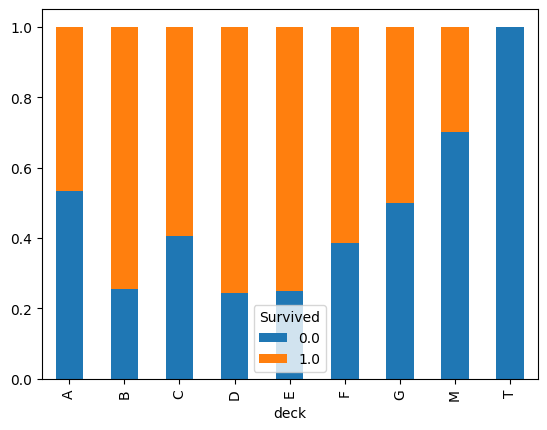

In [75]:
# Analyzing survival rates across different 'Deck' categories

pd.crosstab(df['deck'],df['Survived'],normalize='index').plot(kind='bar',stacked=True)

<Axes: >

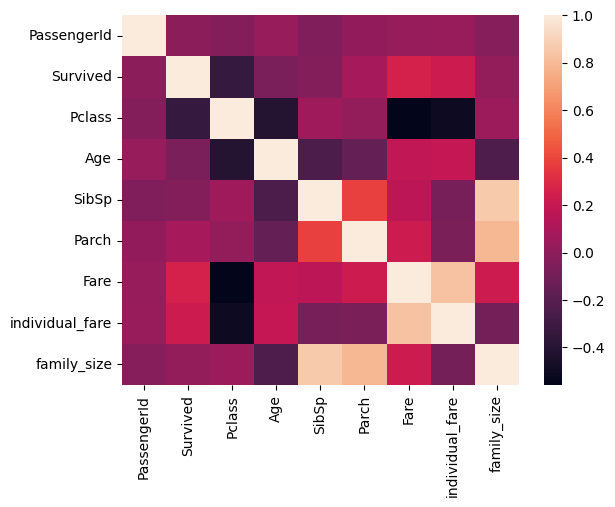

In [76]:
# Visualizing the correlation matrix of numeric columns

numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr())


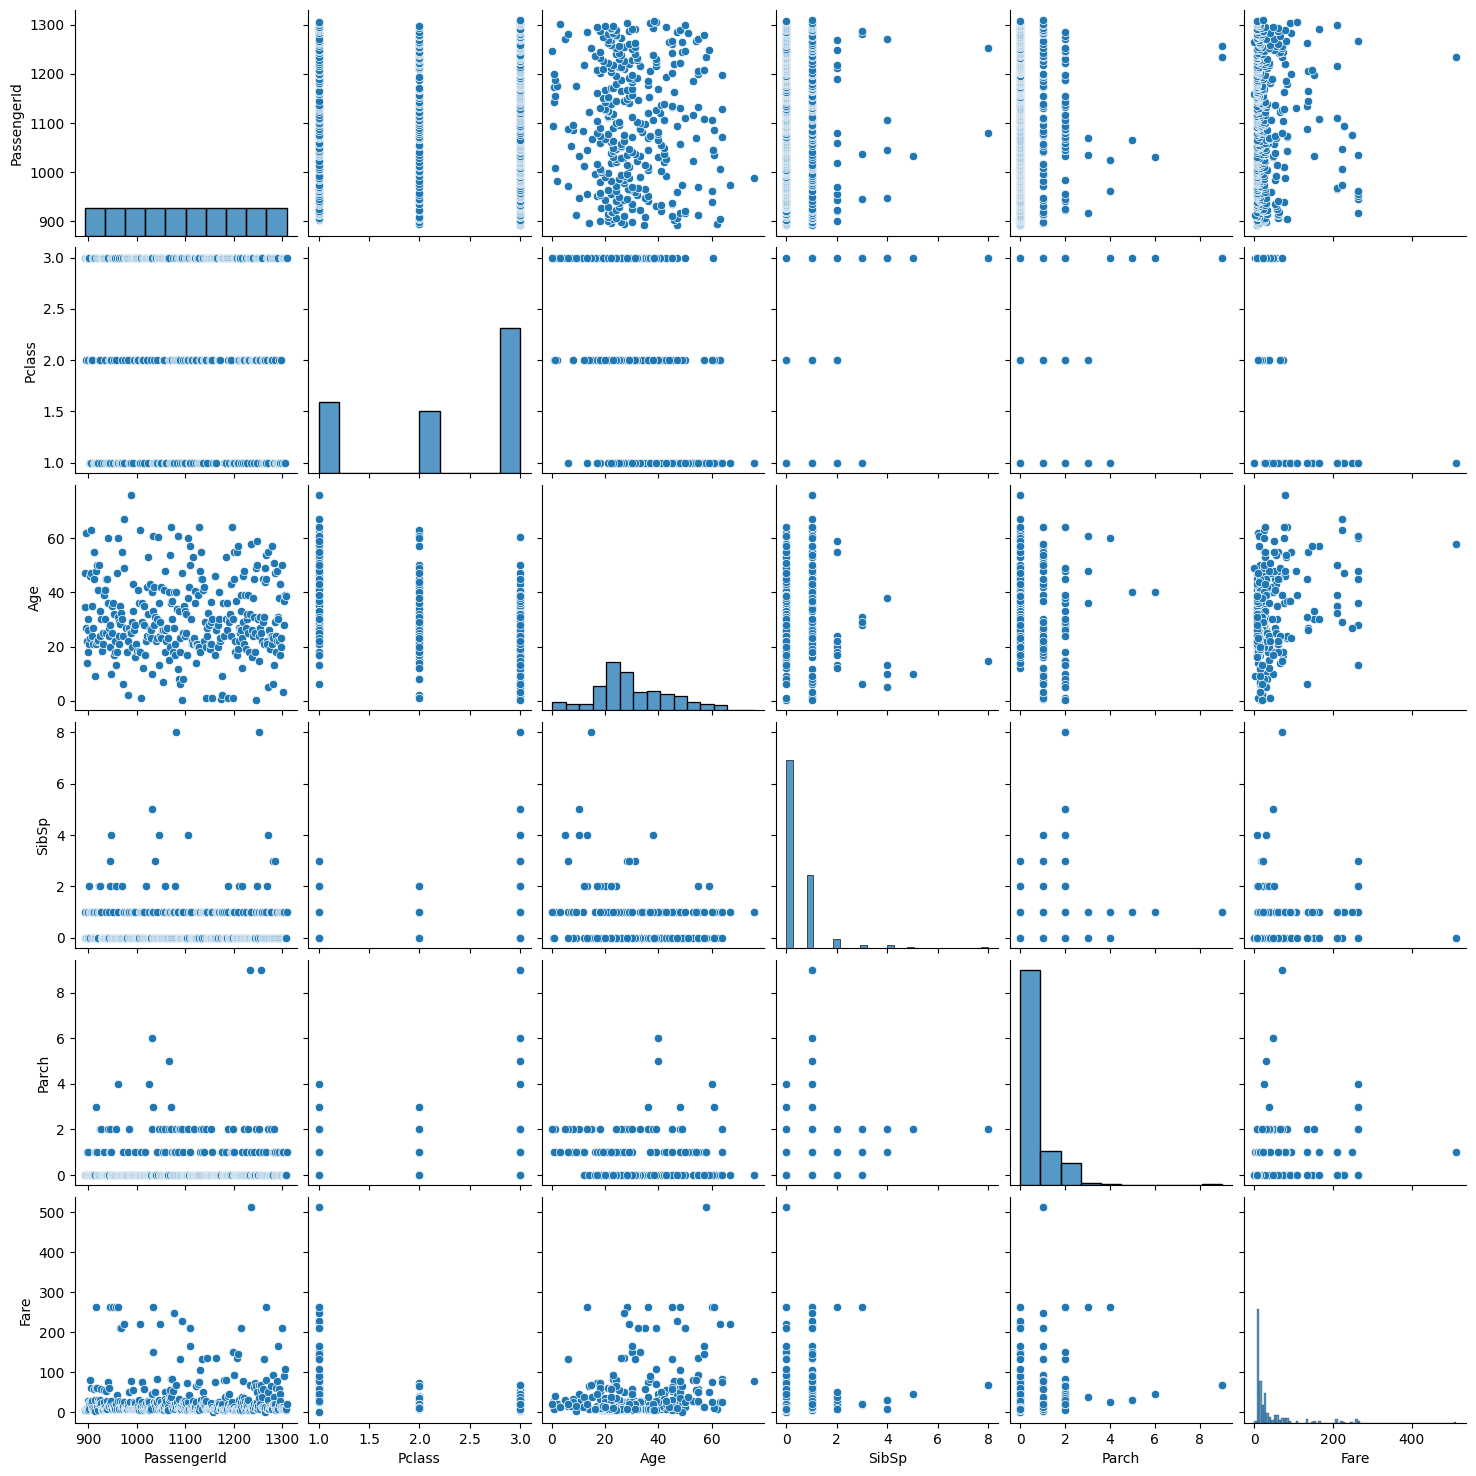

In [77]:
sns.pairplot(df1)

## Final Conclusion

In this analysis of the Titanic dataset, we explored various aspects of passenger data and uncovered key insights:

### 1. Missing Data:
- **19.86%** of the data was missing in the **Age** column.
- The **Cabin** column had approximately **77%** missing values, which were handled by filling missing values with **'M'** to represent missing decks.

### 2. Outliers and Data Transformation:
- The **Fare** column exhibited significant variability due to outliers.
- After dividing the fares among individuals, the average fare dropped from **33.30** to **20.52**, reducing the skewness and making the data more suitable for analysis.

### 3. Family Type Analysis:
- A new categorical column, **Family Type**, was created to categorize passengers into three groups: 
  - **Alone (1)** 
  - **Small (2-4)** 
  - **Large (>5)**
- Analysis revealed that:
  - Passengers traveling alone or in large families had lower survival rates (**30.35%** and **16.13%**, respectively).
  - Small families had the highest survival rate of **57.88%**, indicating they were more likely to survive.

### 4. Survival by Title:
- By extracting titles from the **Name** column, we identified the following:
  - Passengers with titles like **Mrs.**, **Miss.**, and **Master.** had higher survival rates (**79.2%**, **69.78%**, and **57.5%**, respectively).
  - In contrast, **Mr.** and other titles had much lower survival rates (15.67% and 27.78%), indicating that social factors, such as gender and title, might have played a role in survival.

### 5. Deck and Class Analysis:
- The **Deck** column was created from the **Cabin** data, and cross-tabulation revealed the following:
  - Passengers in higher **Pclass** categories (1st class) had better survival chances:
    - **62.96%** survival for 1st class passengers, compared to **24.24%** for 3rd class passengers.
  - The distribution of decks showed that passengers on Decks **A**, **B**, and **C** had relatively higher survival rates.
  - Most passengers in **3rd class** and those with missing deck data ('M') had lower survival chances.

